### Importing Libraries and Defining Functions

In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
from urllib.request import urlopen

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

clf = KMeans(n_clusters = 10)

def showColours(frame):
    modified_image = frame.reshape(frame.shape[0]*frame.shape[1], 3)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

### Loading and Viewing Image

In [2]:
url='https://cdn.britannica.com/96/174596-050-449E7354/Double-Delight-tea-rose-flowers-season.jpg'
req = urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1) 
# load the image
#image = cv2.imread(path)
height, width, layers = image.shape
new_h=height/4
new_w=width/4
image=cv2.resize(image,(int(new_w),int(new_h)),interpolation=cv2.INTER_AREA)
cv2.imshow('image',image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.waitKey(0) 
cv2.destroyWindow('image')

### Calling color detection function for image

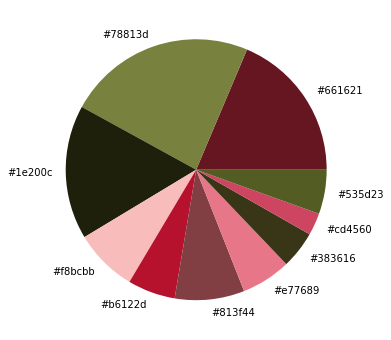

In [3]:
showColours(image)

### Loading and Viewing Video

In [7]:
cap = cv2.VideoCapture(r'D:\Desktop\sample.mp4')
store=[]
while(True):
    _, frame1 = cap.read()
    height, width, layers = frame1.shape
    new_h=height/10
    new_w=width/10
    frame=cv2.resize(frame1,(int(new_w),int(new_h)),interpolation=cv2.INTER_AREA)
    cv2.imshow('frame',frame)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    store.append(frame)
    # Press Q on keyboard to stop recording
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
cv2.destroyWindow('frame')

### Calling color detection function for a few frames from video

In [ ]:
frames=np.array(store)
for i in range(5):
    b=10*i
    showColours(frames[b])